In [1]:
import cv2
import math
import os
import random
import numpy as np

from PIL import Image, ImageDraw, ImageFilter, ImageFont,ImageColor

In [2]:
height=60
width=800

In [3]:
# We create an all white image
image_g = np.ones((height, width)) * 255
# We add gaussian noise
cv2.randn(image_g, 235, 10)

#gausian image creation
gau_back=Image.fromarray(image_g).convert('RGB')

#plain image creation
plain_back=Image.new("L", (width, height), 255).convert('RGB')

#quasi image creation
image = Image.new("L", (width, height))
pixels = image.load()

frequency = random.random() * 30 + 20 # frequency
phase = random.random() * 2 * math.pi # phase
rotation_count = random.randint(10, 20) # of rotations

for kw in range(width):
    y = float(kw) / (width - 1) * 4 * math.pi - 2 * math.pi
    for kh in range(height):
        x = float(kh) / (height - 1) * 4 * math.pi - 2 * math.pi
        z = 0.0
        for i in range(rotation_count):
            r = math.hypot(x, y)
            a = math.atan2(y, x) + i * math.pi * 2.0 / rotation_count
            z += math.cos(r * math.sin(a) * frequency + phase)
        c = int(255 - round(255 * z / rotation_count))
        pixels[kw, kh] = c # grayscale
quasi_back=image.convert('RGB')

In [4]:
'''pictures = os.listdir('/home/space/Pictures/water')

if len(pictures) > 0:
    picture = Image.open('/home/space/Pictures/water/water.jpg')
    picture.crop((0,60,860,800))
else:
    raise Exception('No images where found in the pictures folder!')    '''

"pictures = os.listdir('/home/space/Pictures/water')\n\nif len(pictures) > 0:\n    picture = Image.open('/home/space/Pictures/water/water.jpg')\n    picture.crop((0,60,860,800))\nelse:\n    raise Exception('No images where found in the pictures folder!')    "

In [5]:
#picture.show()

In [6]:
font_size=40
space_width=1
text_color='#010101'

In [7]:
text = 'മലയാളം '

In [8]:
image_font = ImageFont.truetype(font='/home/space/out_python/Rachana-Regular.ttf', size=font_size)
words = text.split(' ')
space_width = image_font.getsize(' ')[0] * space_width

words_width = [image_font.getsize(w)[0] for w in words]
text_width =  width
text_height = 55

txt_img = Image.new('RGBA', (text_width, text_height), (0, 0, 0, 0))

txt_draw = ImageDraw.Draw(txt_img)

colors = [ImageColor.getrgb(c) for c in text_color.split(',')]
c1, c2 = colors[0], colors[-1]

fill = (
    random.randint(c1[0], c2[0]),
    random.randint(c1[1], c2[1]),
    random.randint(c1[2], c2[2])
)

for i, w in enumerate(words):
    txt_draw.text((sum(words_width[0:i]) + i * int(space_width), 0), w, fill=fill, font=image_font)

img=txt_img

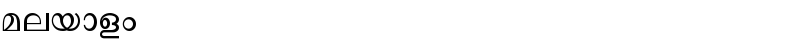

In [9]:
img

In [10]:
background = quasi_back

In [11]:
fimg=background.paste(img,img)


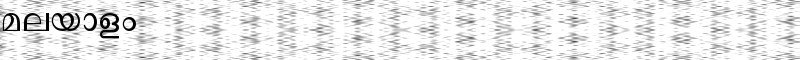

In [12]:
background


In [14]:
background2 = gau_back

In [15]:
fimg=background2.paste(img, img)


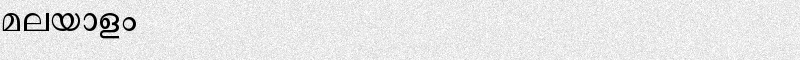

In [16]:
background2